In [147]:
a = [ 0, 0, 1, 1, 0, 0, 
      0, 1, 0, 0, 1, 0,
      1, 1, 1, 1, 1, 1,
      1, 0, 0, 0, 0, 1,
      1, 0, 0, 0, 0, 1]

b = [ 0, 1, 1, 1, 1, 0, 
      0, 1, 0, 0, 1, 0,
      1, 1, 1, 1, 1, 0,
      1, 0, 0, 0, 1, 1,
      1, 0, 0, 1, 0, 1]

c = [ 0, 1, 1, 1, 0, 0, 
      0, 1, 0, 0, 1, 0,
      1, 1, 1, 1, 1, 1,
      1, 1, 0, 0, 0, 1,
      1, 1, 0, 0, 0, 1]

In [148]:
y = [[1, 0, 0],
     [0, 1, 0],
     [0, 0, 1]]

In [149]:
import numpy as np
import matplotlib.pyplot as plt

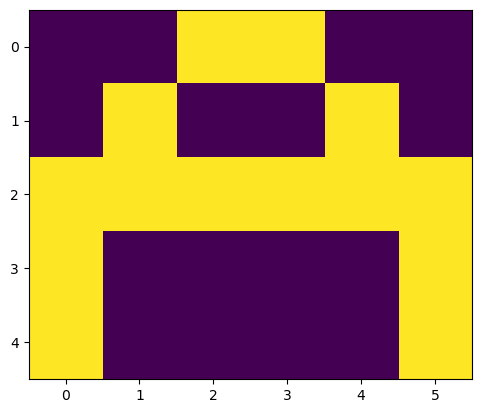

In [150]:
#visualise the data 
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [152]:
x = [np.array(a).reshape(1,30), np.array(b).reshape(1,30), np.array(a).reshape(1,30)]
y = np.array(y)
print(x, "\n\n",y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 0, 1]]), array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [153]:
#activitation function
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [154]:
def f_forward(x, w1, w2):
    #hidden layer 
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    #output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)
    return(a2)
    

In [155]:
def generate_wt(x,y):
    l = []
    for i in range(x*y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x,y))

In [156]:
def loss(out,Y):
    s = (np.square(out-Y))
    loss = np.sum(s)/len(y)
    return(loss)

In [171]:
def back_prop(x,y,w1, w2, alpha):
    #hidden layer 
    z1 = x.dot(w1)
    a1 = sigmoid(z1)

    #output layer
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    d2= (a2-y)
    d1 = np.multiply(d2.dot(w2.T),np.multiply(a1, 1 -a1))

    #gradient
    w1_adj = x.transpose().dot(d1)
    w2_adj = a1.transpose().dot(d2)

    w1 =w1 - (alpha*(w1_adj))
    w2 =w2 - (alpha*(w2_adj))

    return (w1, w2)

In [172]:
def train(x, Y, w1, w2, alpha=0.01, epoch=10):
    acc = []
    loss_values = []
    accuracy = []
    
    for j in range(epoch):
        l = []
        for i in range(len(x)):
            Out = f_forward(x[i], w1, w2)
            l.append(loss(Out, Y[i]))
            w1, w2 = back_prop(x[i], Y[i], w1, w2, alpha)
        epoch = range(len(acc))    
         
        
        print("Epochs:", j + 1, "acc:", (1 - (sum(l) / len(x))) * 100)
        acc.append((1 - (sum(l) / len(x))) * 100)
        loss_values.append(sum(l) / len(x))
    return acc, loss_values, w1, w2
               

In [165]:
#epoch = range(len(accuracy)) 

In [173]:
def predict(x,w1,w2):
    Out = f_forward(x,w1,w2)
    maxm=0
    k=0
    for i in range(len(Out[0])):
        if(maxm<Out[0][i]):
            maxm = Out[0][i]
            k=i
    if (k == 0):
        print("Image is of letter A")
    elif (k == 1):
        print("Image is of letter B")
    else:
        print("Image is of letter C")
    plt.imshow(x.reshape(5,6))
    plt.show()

In [174]:
w1 = generate_wt(30,5)
w2 = generate_wt(5,3)
print(w1, "\n", w2)

[[ 1.25401415  0.53447311  0.23248477 -1.46892512 -0.15496281]
 [ 0.45619801  0.23943605 -0.27506151 -0.07358583  0.88174794]
 [-0.85603813 -0.06014093  1.47725214  1.14712674  0.21923683]
 [ 0.27736015 -0.5716462   0.35824557  2.12783378 -1.33393017]
 [-0.51296727 -0.04832283  0.98827922 -0.95258593 -0.02516009]
 [ 0.05354865 -0.37330514 -0.06915092 -0.16181343 -0.31725286]
 [-0.62905793 -0.31635963 -0.37915614  0.50735387 -1.08771664]
 [-0.55263687 -0.13507171 -0.3236251   1.51095516  2.5975152 ]
 [-0.85010974 -0.30461306 -0.3975814  -0.18046463 -0.44535666]
 [-0.28864715  1.85550537 -0.10232499  0.03949353  0.22298681]
 [-0.92812416  0.07459509 -0.72934376 -0.40468395 -0.34928062]
 [-0.37825927 -2.45557357  0.80090999 -0.62800845 -0.71079104]
 [-0.16515819  0.69815533 -1.63477011  0.92219394  0.13015274]
 [ 0.29609857 -0.15044737  0.75618579  1.38797226  0.96813375]
 [-0.36782131  1.1925074  -0.70711154  2.03877333  2.02651437]
 [-0.17482453  0.56550253  1.09853236  0.56127611 -0.35

In [175]:
acc, loss_values, w1, w2 = train( x, y, w1, w2, 0.01, 100)


Epochs: 1 acc: 69.48742727685652
Epochs: 2 acc: 69.7538879983409
Epochs: 3 acc: 70.01469920353804
Epochs: 4 acc: 70.26973178550769
Epochs: 5 acc: 70.51887504218517
Epochs: 6 acc: 70.76203687031466
Epochs: 7 acc: 70.99914377392619
Epochs: 8 acc: 71.23014069592064
Epochs: 9 acc: 71.45499068430317
Epochs: 10 acc: 71.67367440705907
Epochs: 11 acc: 71.88618953156288
Epochs: 12 acc: 72.09254998574825
Epochs: 13 acc: 72.29278511906097
Epochs: 14 acc: 72.4869387815003
Epochs: 15 acc: 72.67506833888065
Epochs: 16 acc: 72.85724364186794
Epochs: 17 acc: 73.03354596543487
Epochs: 18 acc: 73.20406693419952
Epochs: 19 acc: 73.36890744773319
Epochs: 20 acc: 73.5281766184074
Epochs: 21 acc: 73.68199073275869
Epochs: 22 acc: 73.83047224573218
Epochs: 23 acc: 73.97374881556975
Epochs: 24 acc: 74.11195238557005
Epochs: 25 acc: 74.2452183174967
Epochs: 26 acc: 74.37368458006956
Epochs: 27 acc: 74.49749099475716
Epochs: 28 acc: 74.61677854000376
Epochs: 29 acc: 74.73168871407867
Epochs: 30 acc: 74.84236295

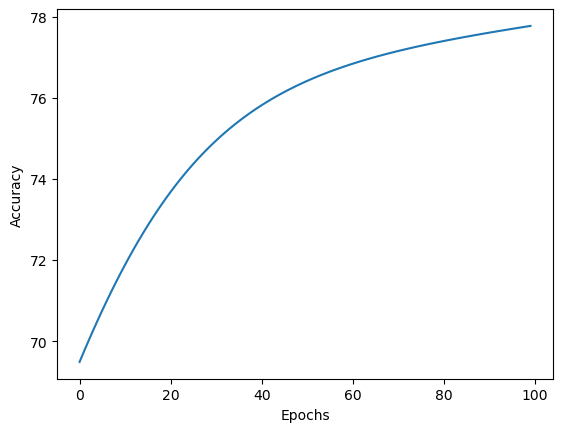

In [180]:
import matplotlib.pyplot as plt1

plt1.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel("Epochs")
plt1.show()

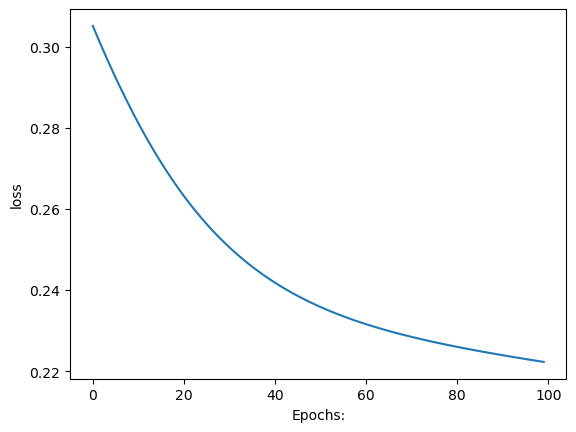

In [183]:
plt1.plot(loss_values)
plt.ylabel('loss')
plt.xlabel("Epochs:")
plt1.show()

Image is of letter C


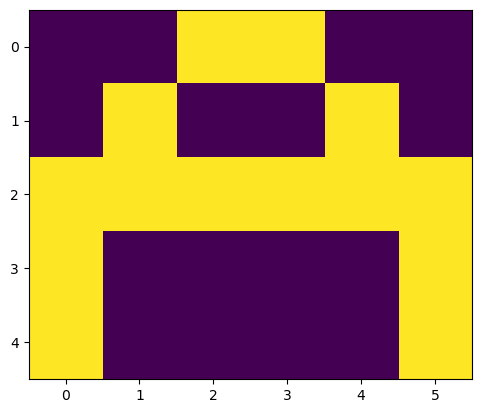

In [145]:
predict(x[2], w1, w2)